In [34]:
# Load data in native format

import json

with open('out/streams_9135174515.json', 'r') as f:
    raw_data = json.load(f)

for variable, timeseries in raw_data.items():
    print(f'{variable}: {timeseries[:5]}')

# import glob
# for file_path in glob.glob('out/streams_*.json'):
#     with open(file_path, 'r') as f:
#         data = json.load(f)

altitude: [1709.2, 1708.9, 1707.8, 1707.1, 1706.9]
cadence: [48, 51, 51, 51, 79]
distance: [0, 4.6, 12.7, 18.7, 25.5]
grade_adjusted_distance: [0, 4.1, 11.1, 16.8, 23.1]
grade_adjusted_pace: [0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077]
grade_smooth: [-11, -11.2, -9, -15.1, -15]
heartrate: [91, 90, 92, 95, 100]
latlng: [[40.019578, -105.298032], [40.019593, -105.297982], [40.019619, -105.297896], [40.019624, -105.297826], [40.019626, -105.297746]]
pace: [0.2874049027895182, 0.2874049027895182, 0.2874049027895182, 0.2874049027895182, 0.2874049027895182]
privacy: [0, 0, 0, 0, 0]
resting: [False, False, False, False, False]
time: [0, 2, 5, 7, 9]


In [36]:
# Transform into dataframe

import pandas as pd

data = pd.DataFrame(raw_data)
data.head()

,altitude,cadence,distance,grade_adjusted_distance,grade_adjusted_pace,grade_smooth,heartrate,latlng,pace,privacy,resting,time
0,1709.2,48,0.0,0.0,0.307692,-11.0,91,"[40.019578, -105.298032]",0.287405,0,False,0
1,1708.9,51,4.6,4.1,0.307692,-11.2,90,"[40.019593, -105.297982]",0.287405,0,False,2
2,1707.8,51,12.7,11.1,0.307692,-9.0,92,"[40.019619, -105.297896]",0.287405,0,False,5
3,1707.1,51,18.7,16.8,0.307692,-15.1,95,"[40.019624, -105.297826]",0.287405,0,False,7
4,1706.9,79,25.5,23.1,0.307692,-15.0,100,"[40.019626, -105.297746]",0.287405,0,False,9


In [2]:
# Load data as DataFrame (does not load all cols tho)

import pandas as pd

data = pd.read_json('out/streams_9135174515.json')

data.head()

,altitude,cadence,distance,grade_adjusted_distance,grade_adjusted_pace,grade_smooth,heartrate,latlng,pace,privacy,resting,time
0,1709.2,48,0.0,0.0,0.307692,-11.0,91,"[40.019578, -105.298032]",0.287405,0,False,0
1,1708.9,51,4.6,4.1,0.307692,-11.2,90,"[40.019593, -105.297982]",0.287405,0,False,2
2,1707.8,51,12.7,11.1,0.307692,-9.0,92,"[40.019619, -105.297896]",0.287405,0,False,5
3,1707.1,51,18.7,16.8,0.307692,-15.1,95,"[40.019624, -105.297826]",0.287405,0,False,7
4,1706.9,79,25.5,23.1,0.307692,-15.0,100,"[40.019626, -105.297746]",0.287405,0,False,9


## Understanding the variables

In [6]:
data.isnull().sum()

altitude                   0
cadence                    0
distance                   0
grade_adjusted_distance    0
grade_adjusted_pace        0
grade_smooth               0
heartrate                  0
latlng                     0
pace                       0
privacy                    0
resting                    0
time                       0
dtype: int64

That is nice to see. Sometimes, one or more variables doesn't appear in the first few records. For example, if the device has not found GPS signal before the athlete presses start. 

In [3]:
data.describe()

,altitude,cadence,distance,grade_adjusted_distance,grade_adjusted_pace,grade_smooth,heartrate,pace,privacy,time
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.0,570.000000
mean,1844.596667,57.294737,3791.527193,6352.321228,0.449428,-1.465614,132.836842,0.716065,0.0,2796.007018
std,109.586324,25.220660,2388.416562,3593.500821,0.127148,19.795894,8.980532,0.340467,0.0,1552.140863
min,1684.600000,0.000000,0.000000,0.000000,0.287511,-39.400000,90.000000,0.251938,0.0,0.000000
25%,1752.150000,51.000000,1804.850000,3726.025000,0.368446,-17.225000,127.250000,0.434225,0.0,1622.500000
50%,1828.300000,65.500000,3401.200000,5993.050000,0.417441,-7.100000,134.000000,0.677431,0.0,2788.000000
75%,1925.700000,74.000000,6001.075000,9571.775000,0.488468,16.300000,140.000000,0.951427,0.0,4143.250000
max,2069.100000,123.000000,7875.500000,12280.000000,1.098901,35.300000,150.000000,1.695906,0.0,5321.000000


array([[<Axes: title={'center': 'altitude'}>,
        <Axes: title={'center': 'cadence'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'grade_adjusted_distance'}>,
        <Axes: title={'center': 'grade_adjusted_pace'}>,
        <Axes: title={'center': 'grade_smooth'}>],
       [<Axes: title={'center': 'heartrate'}>,
        <Axes: title={'center': 'pace'}>,
        <Axes: title={'center': 'privacy'}>],
       [<Axes: title={'center': 'time'}>, <Axes: >, <Axes: >]],
      dtype=object)

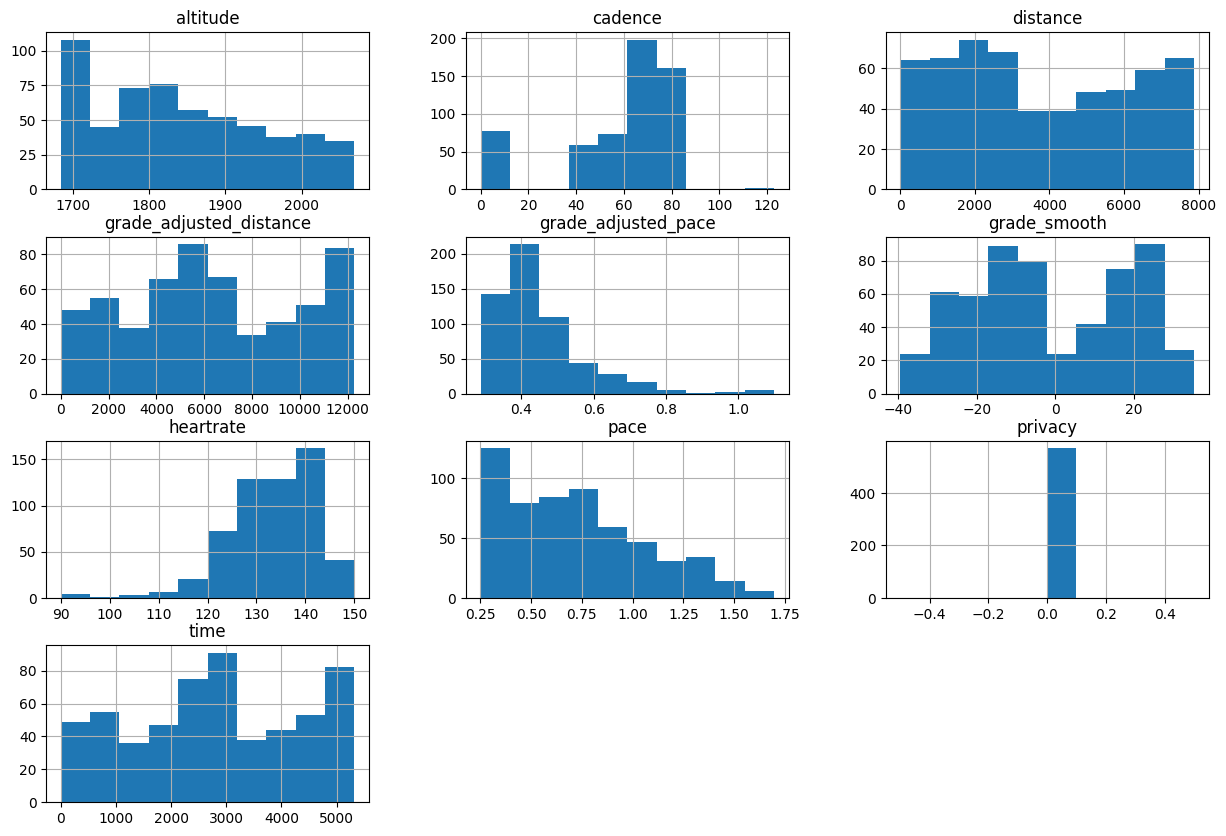

In [12]:
data.hist(figsize=(15, 10))

IndexError: index 7 is out of bounds for axis 0 with size 7

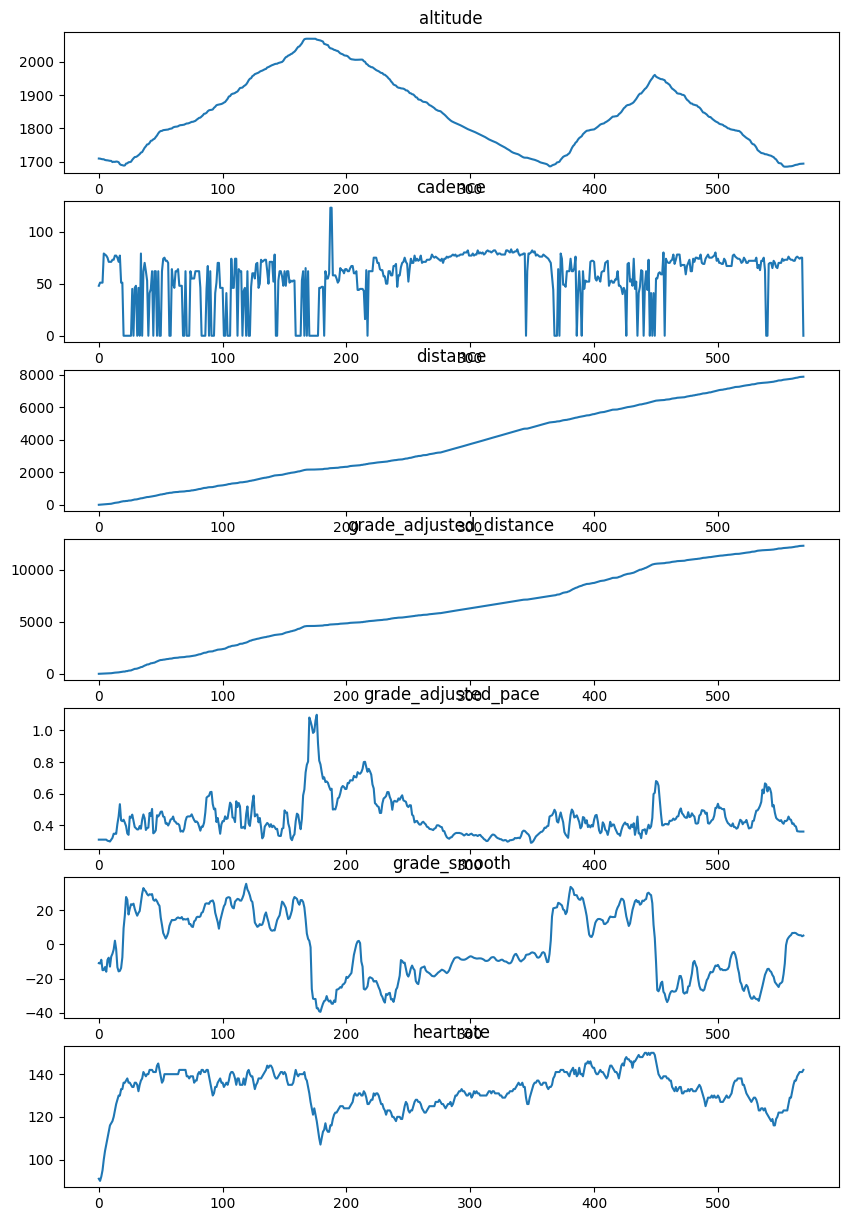

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 15))

# Iterate over the columns and plot each variable
for i, column in enumerate(data.columns):
    data[column].plot(ax=axes[i])
    axes[i].set_title(column)

# Adjust spacing between subplots
# plt.tight_layout()

# Display the plot
plt.show()

## Understanding the relationships between variables

array([[<Axes: xlabel='grade_smooth', ylabel='grade_smooth'>,
        <Axes: xlabel='grade_adjusted_pace', ylabel='grade_smooth'>,
        <Axes: xlabel='pace', ylabel='grade_smooth'>,
        <Axes: xlabel='cadence', ylabel='grade_smooth'>,
        <Axes: xlabel='heartrate', ylabel='grade_smooth'>],
       [<Axes: xlabel='grade_smooth', ylabel='grade_adjusted_pace'>,
        <Axes: xlabel='grade_adjusted_pace', ylabel='grade_adjusted_pace'>,
        <Axes: xlabel='pace', ylabel='grade_adjusted_pace'>,
        <Axes: xlabel='cadence', ylabel='grade_adjusted_pace'>,
        <Axes: xlabel='heartrate', ylabel='grade_adjusted_pace'>],
       [<Axes: xlabel='grade_smooth', ylabel='pace'>,
        <Axes: xlabel='grade_adjusted_pace', ylabel='pace'>,
        <Axes: xlabel='pace', ylabel='pace'>,
        <Axes: xlabel='cadence', ylabel='pace'>,
        <Axes: xlabel='heartrate', ylabel='pace'>],
       [<Axes: xlabel='grade_smooth', ylabel='cadence'>,
        <Axes: xlabel='grade_adjusted_pace

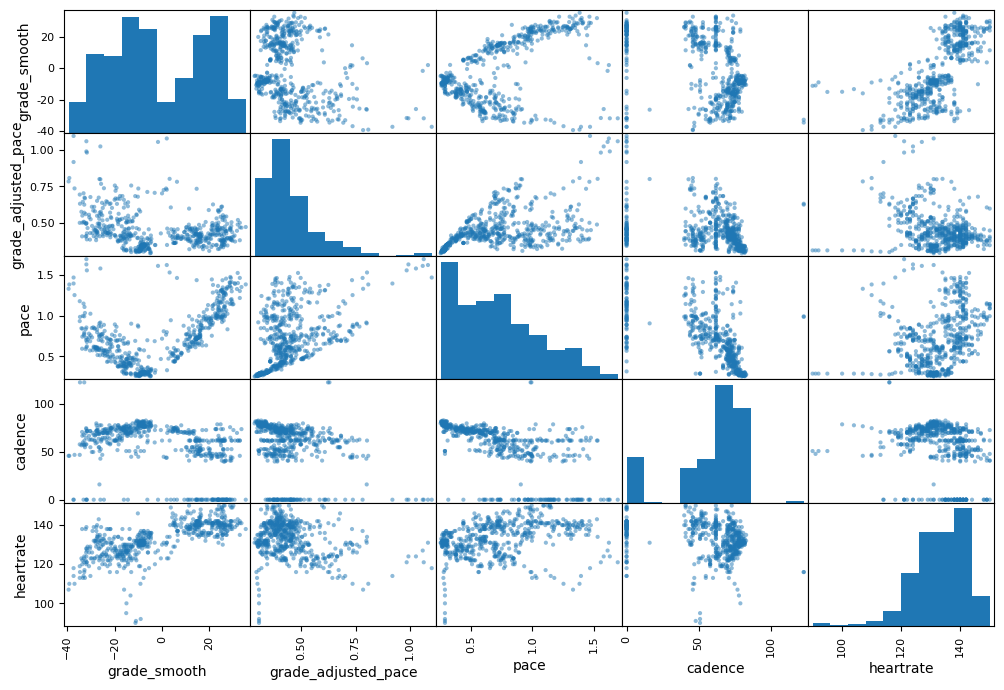

In [39]:
from pandas.plotting import scatter_matrix

variables = [
    'grade_smooth', 'grade_adjusted_pace', 'pace',
    # 'cadence', 'heartrate'
]

scatter_matrix(data[variables], figsize=(12, 8))

In [ ]:
data.plot(kind='scatter', x='grade_smooth', y='grade_adjusted_pace')

## Feature creation

<Axes: xlabel='grade_smooth', ylabel='grade_factor_speed'>

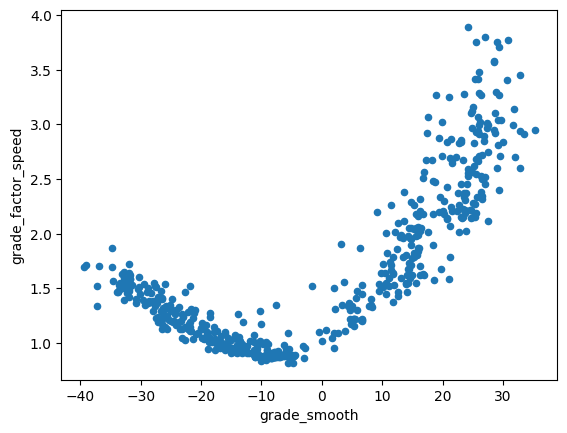

In [43]:
data['grade_factor_speed'] = data['pace'] / data['grade_adjusted_pace']
data.plot(kind='scatter', x='grade_smooth', y='grade_factor_speed')

<Axes: xlabel='grade_smooth', ylabel='grade_factor_distance'>

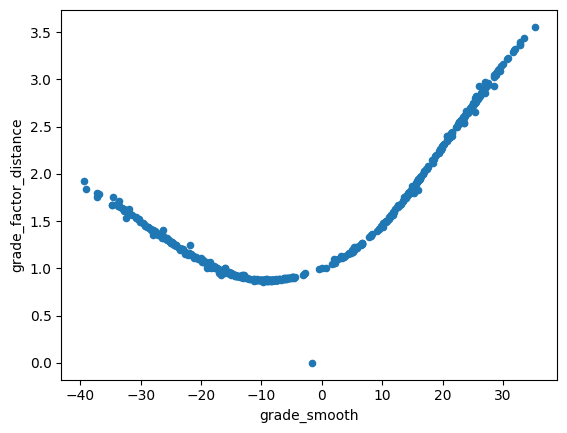

In [47]:
data['grade_factor_distance'] = data['grade_adjusted_distance'].diff() / data['distance'].diff()
data.plot(kind='scatter', x='grade_smooth', y='grade_factor_distance')

It seems pretty clear how GAP is calculated. The distance adjustment factor is purely a function of `grade_smooth`.

This is technically an unofficial result that passes a major gut check.
Needs to be more rigorously confirmed.